In [39]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

# We will be answering the following questions on the stocks:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular
stock?

7.) How can we attempt to predict future stock behavior?

In [8]:
# List of tickers for stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [9]:
# Set up timeframes

end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [41]:
# For loop to grab data
# RHS: Datareader will take stock ticker, the website, 
# and the start and end date
# LHS: globals takes the stock ticker and makes it into
# a global variable
for stock in tech_list:
    globals()[stock] = DataReader(stock,'google',start, end)

In [42]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,126.302510,127.175578,125.554343,126.460797,3.036904e+07
std,17.058728,17.067042,16.940281,17.009150,1.420021e+07
min,96.820000,97.970000,96.420000,96.670000,1.147592e+07
25%,111.380000,112.275000,110.430000,111.580000,2.195617e+07
50%,118.900000,119.930000,118.600000,119.750000,2.637438e+07
75%,143.410000,144.140000,142.460000,143.570000,3.380550e+07
max,156.010000,156.650000,155.050000,156.100000,1.123403e+08


In [43]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-07-18 to 2017-07-14
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


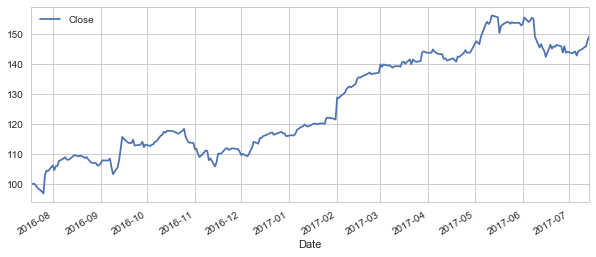

In [46]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

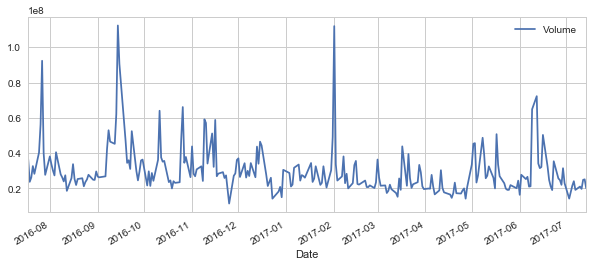

In [47]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

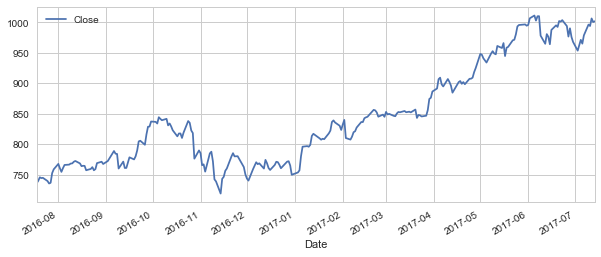

In [48]:
AMZN['Close'].plot(legend=True, figsize=(10,4))

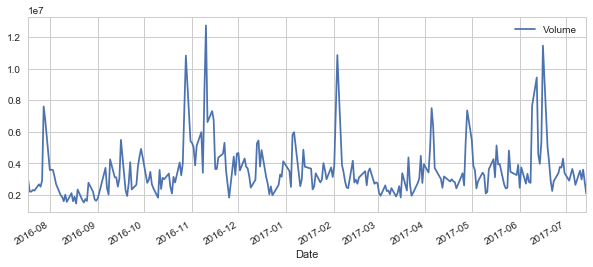

In [49]:
AMZN['Volume'].plot(legend=True, figsize=(10,4))

In [66]:
# We are going to average over 10, 20 ,50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series.rolling(AAPL['Close'],
                                          ma).mean()

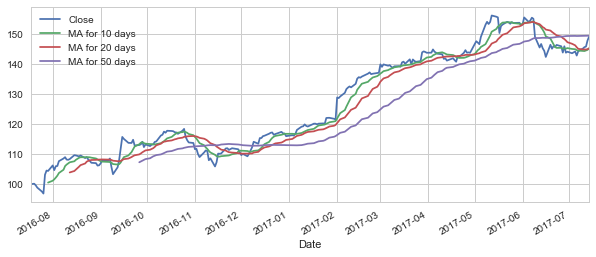

In [71]:
# Here we plot the moving averages
AAPL[['Close', 'MA for 10 days','MA for 20 days',
     'MA for 50 days']].plot(subplots=False,
                            figsize=(10,4))

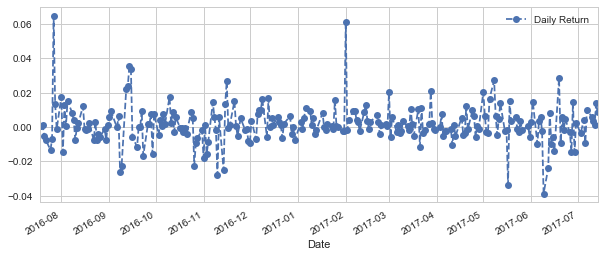

In [73]:
# We will now look at daily returns 

AAPL['Daily Return'] = AAPL['Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True,
                         linestyle='--', marker='o')

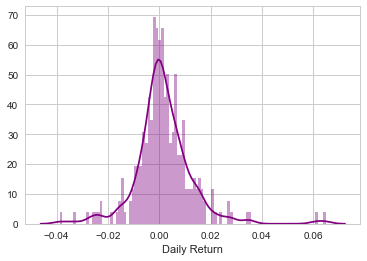

In [74]:
# Now we look at the average daily returns

sns.distplot(AAPL['Daily Return'].dropna(), 
            bins=100, color='purple')

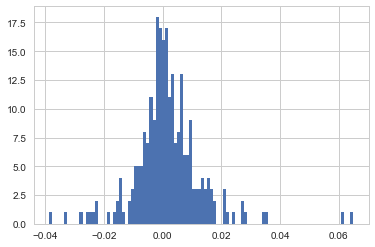

In [77]:
# Same graphs can be recreated with pandas
AAPL['Daily Return'].hist(bins=100)

In [80]:
closing_df = DataReader(tech_list,'google',start, end)['Close']

In [81]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-07-18,99.83,736.07,733.78,53.96
2016-07-19,99.87,739.95,736.96,53.09
2016-07-20,99.96,745.72,741.19,55.91
2016-07-21,99.43,744.43,738.63,55.80
2016-07-22,98.66,744.86,742.74,56.57


In [82]:
# We can get the daily return for all the stocks
tech_rets = closing_df.pct_change()

In [83]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-07-18,NaN,NaN,NaN,NaN
2016-07-19,0.000401,0.005271,0.004334,-0.016123
2016-07-20,0.000901,0.007798,0.005740,0.053117
2016-07-21,-0.005302,-0.001730,-0.003454,-0.001967
2016-07-22,-0.007744,0.000578,0.005564,0.013799


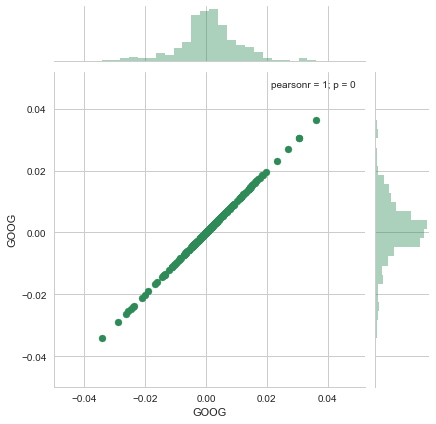

In [89]:
# Can compare the daily pct return between stocks to see
# if they are correlated

sns.jointplot('GOOG','GOOG', tech_rets,
             kind='scatter', color='seagreen')

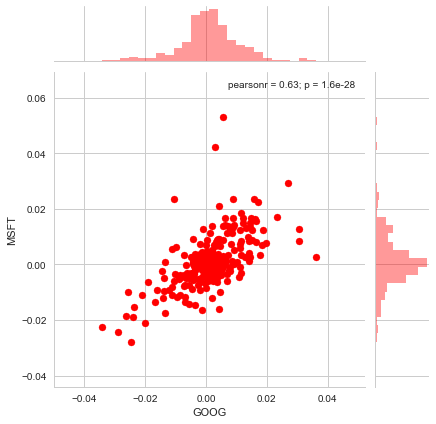

In [91]:
sns.jointplot('GOOG','MSFT', tech_rets,
             kind='scatter', color='red')

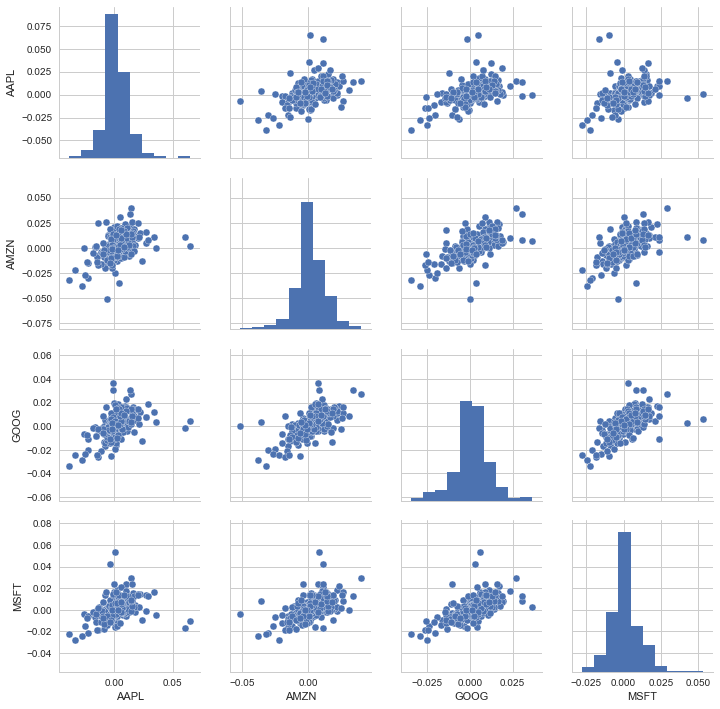

In [96]:
sns.pairplot(tech_rets.dropna())

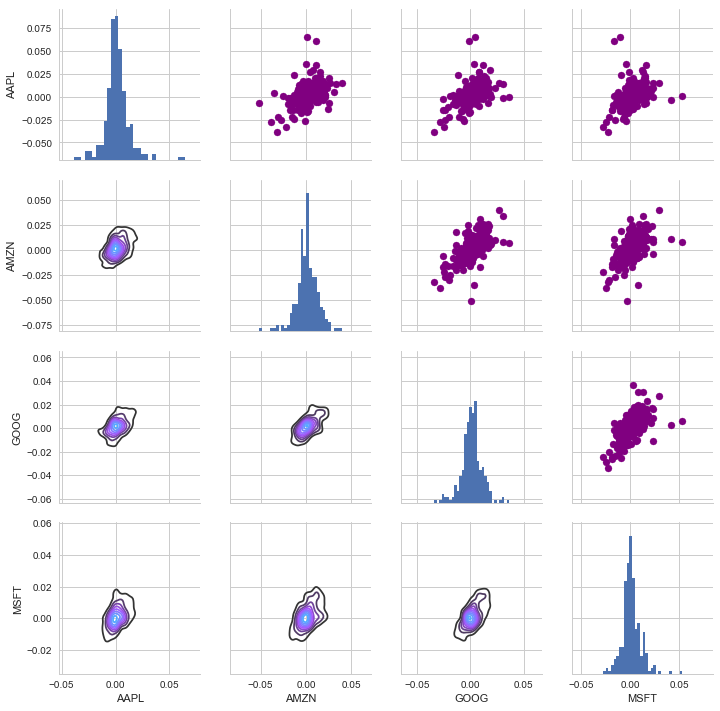

In [100]:
# we can control the plot much better with sns.pairgrid
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

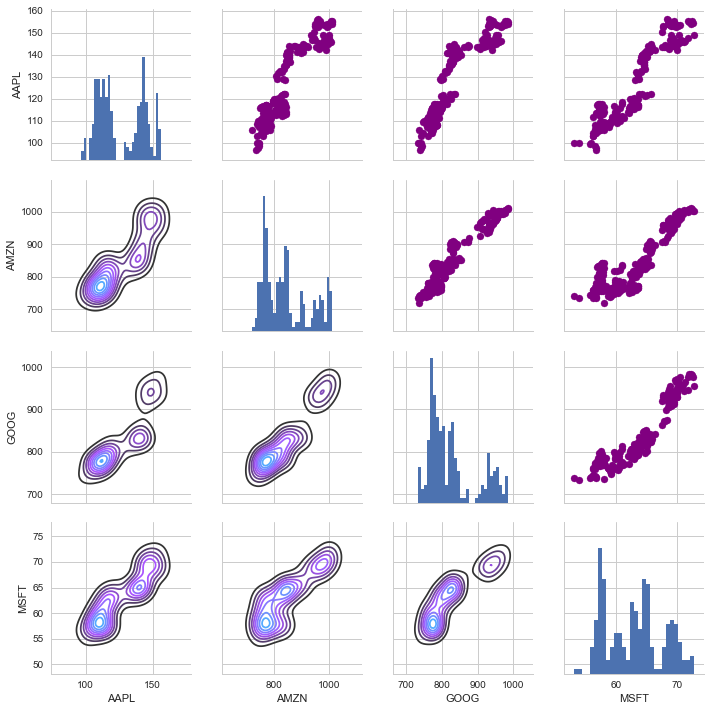

In [102]:
# We can make the same plot for correlation between
# the closing prices

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

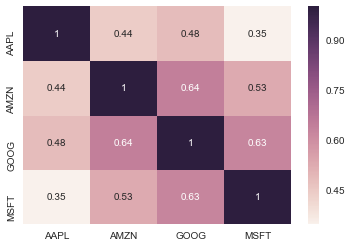

In [106]:
sns.heatmap(tech_rets.corr(),annot=True)

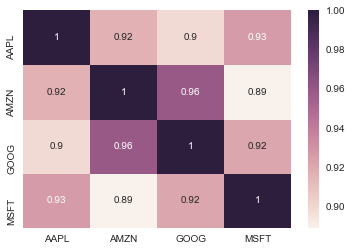

In [107]:
sns.heatmap(closing_df.corr(), annot=True)

In [108]:
# Here we are going to see how we are going to 
# quantify risk

rets = tech_rets.dropna()

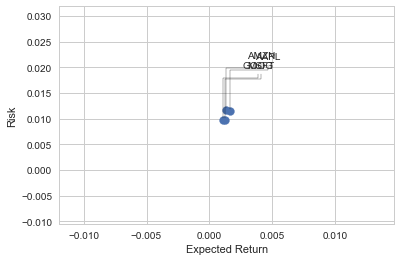

In [123]:
# Area is used to define area of circles for scatter
# plot
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')

plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, xy = (x, y), xytext=(50,50),
        textcoords ='offset points', ha='right',
        va='bottom',arrowprops=dict(arrowstyle='-',
        connectionstyle='bar,angle=180,fraction=-0.2')
    )

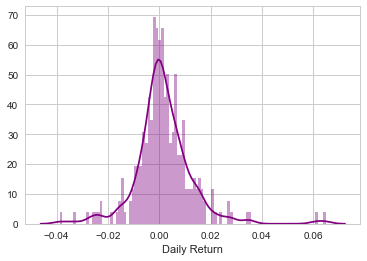

In [124]:
# Value at risk: the amount of money we are willing to risk
# for a specific confidence interval

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [126]:
# The result is the empirical quantile
# with 95 percent confidence your worst
# daily loss would not exceed 1.4

# I.E if we a million dollar investment, our 
# one-day 5% Value at risk (VaR) is
# 0.014*1,000,000 = $14,000

rets['AAPL'].quantile(0.05)

-0.014776823025706293

In [127]:
# Lets look at the VaR for the other stocks

rets['GOOG'].quantile(0.05)

-0.01426865599538824

In [128]:
rets['MSFT'].quantile(0.05)

-0.01356824956195934

In [129]:
rets['AMZN'].quantile(0.05)

-0.01588980627438124

In [130]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [135]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] +(price[x-1] * (drift[x]+shock[x]))
        
    return price

In [136]:
GOOG.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-18,722.71,736.13,721.19,733.78,1295476
2016-07-19,729.89,736.99,729.00,736.96,1227486
2016-07-20,737.33,742.13,737.10,741.19,1289671
2016-07-21,740.36,741.69,735.83,738.63,1026306
2016-07-22,741.86,743.24,736.56,742.74,1259823


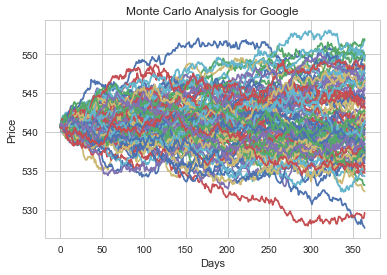

In [137]:
start_price = 540.74

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, 
                               sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [138]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,
                                        days, mu,
                                         sigma)[days-1]

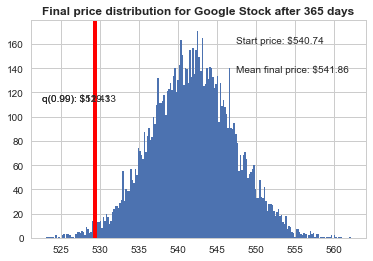

In [143]:
# Uses numpy to define q as the 1% empirical quantile
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean Ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %(start_price -q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile resutl
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold');


# 